In [212]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [213]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv")
market_data_df.set_index('coin_id', inplace=True)
numerical_columns = [
    'price_change_percentage_24h', 'price_change_percentage_7d',
    'price_change_percentage_14d', 'price_change_percentage_30d',
    'price_change_percentage_60d', 'price_change_percentage_200d',
    'price_change_percentage_1y']
# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [214]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [215]:
scaler =StandardScaler()
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [216]:

# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

market_data_scaled_df= scaler.fit_transform(market_data_df)

market_data_scaled_df

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [217]:
market_data_scaled_df = pd.DataFrame(market_data_scaled_df, columns=numerical_columns)
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [218]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled_df, columns=market_data_df.columns)
# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = market_data_df.index

# Set the coin_id column as index
market_data_scaled_df = market_data_scaled_df.set_index("coin_id")


# Display sample data

market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [219]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
  # . Create a KMeans model using the loop counter for the n_clusters
  model = KMeans(n_clusters=i, n_init='auto', random_state=0)
  # 2. Fit the model to the data using the scaled DataFrame
  model.fit(market_data_scaled_df)
  # 3. Append the model.inertia_ to the inertia list
  inertia.append(model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k,"inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
# Display the DataFramed
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

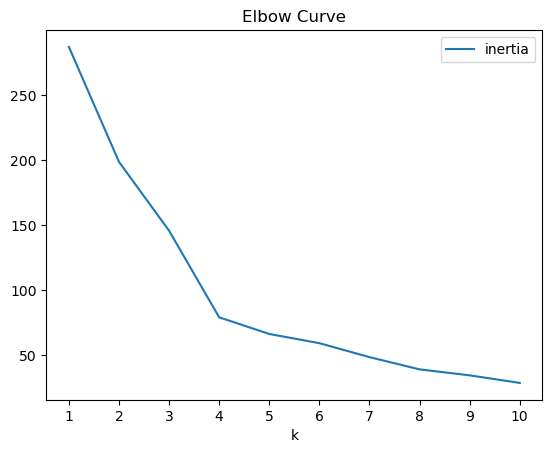

In [220]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4.

## Part 2

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [221]:
# Initialize the K-Means model using the best value for k
import sklearn
from sklearn.cluster import KMeans

In [222]:
# Fit the K-Means model using the scaled data
model = KMeans(n_clusters=4, n_init='auto', random_state=1)
model.fit(market_data_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [223]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cryptocurrencies_predictions= model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
print(cryptocurrencies_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [224]:
# Create a copy of the DataFrame
cryptocurrencies_predictions_df = market_data_df.copy()

In [225]:
# Add a new column to the DataFrame with the predicted clusters
cryptocurrencies_predictions_df['crypto_cluster'] = cryptocurrencies_predictions

# Display sample data
cryptocurrencies_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [226]:
cryptocurrencies_predictions_df["crypto_cluster"].value_counts()


crypto_cluster
0    26
2    13
3     1
1     1
Name: count, dtype: int64

<Axes: title={'center': 'Crypto_Cluster_Plot'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

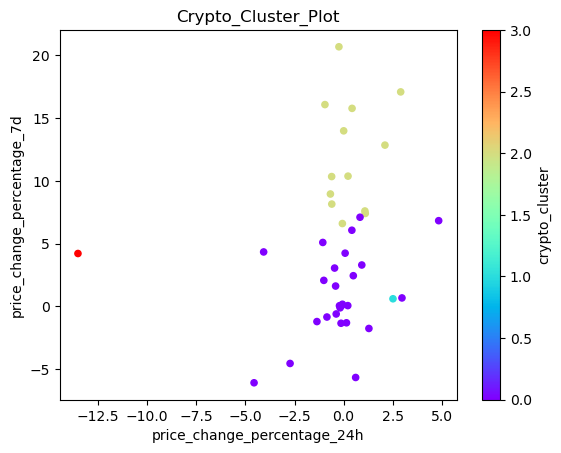

In [227]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
cryptocurrencies_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y= "price_change_percentage_7d", 
    c= "crypto_cluster",
    title= "Crypto_Cluster_Plot",
    colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [228]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

In [229]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca = PCA(n_components=3)
market_pca = pca.fit_transform(market_data_scaled_df)
# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [230]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .9 or 90 percent and dropped 10 percent of the data.

In [231]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_pca = pd.DataFrame(market_pca, columns=(['PC1', 'PC2', 'PC3']))

# Copy the crypto names from the original data
market_pca["coin_id"]= market_data_df.index

# Set the coinid column as index
market_pca = market_pca.set_index("coin_id")

# Display sample data
market_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [232]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
  # . Create a KMeans model using the loop counter for the n_clusters
  model = KMeans(n_clusters=i, n_init='auto', random_state=0)
  # 2. Fit the model to the data using the scaled DataFrame
  model.fit(market_pca)
  # 3. Append the model.inertia_ to the inertia list
  inertia.append(model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k,"inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
# Display the DataFramed
elbow_df.head()




# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

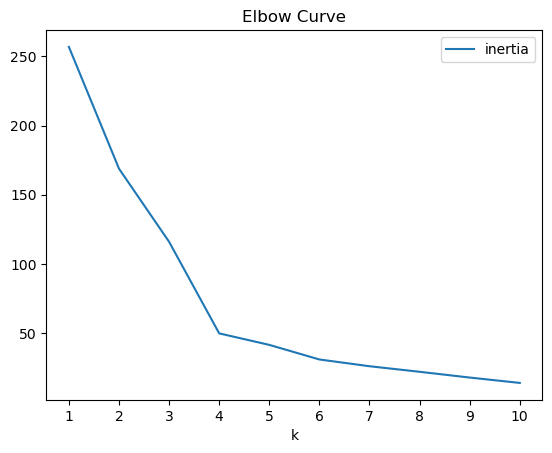

In [233]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for K is 4. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Remain the same value.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [234]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [235]:
# Fit the K-Means model using the PCA data
model.fit(market_pca)

KMeans(n_clusters=4, random_state=1)

In [236]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(market_pca)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [237]:
# Create a copy of the DataFrame with the PCA data
market_pca_df = market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_df["k_4"] = k_4

# Display sample data
market_pca_df

,PC1,PC2,PC3,k_4
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: xlabel='PC1', ylabel='PC2'>

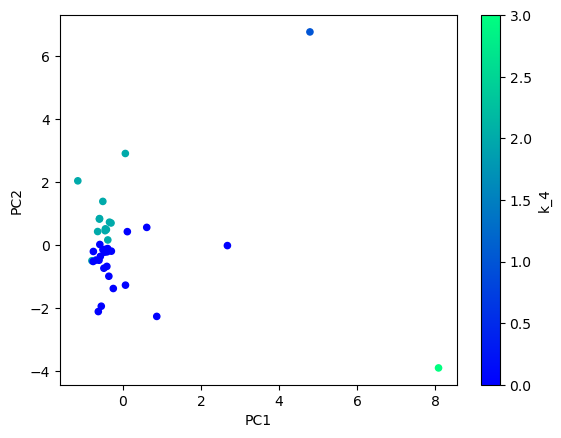

In [238]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_pca_df.plot.scatter(
    x = "PC1",
    y = "PC2",
    c = "k_4",
    colormap = "winter"
)

### Determine the Weights of Each Feature on each Principal Component

In [241]:
# Use the columns from the original scaled DataFrame as the index.
pca_weights = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3"], index= market_data_scaled_df.columns)
pca_weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PC1 Positves are price_change_percentage 1y, 200d, 
              PC2 Percentage 60 d
              PC3 Perentage 7d